In [20]:
import os
import pandas as pd
from  steam_api import get_all_apps
from steam_web_api import Steam







In [ ]:
all_apps = get_all_apps()

In [22]:
all_apps_df = pd.DataFrame(all_apps)
all_apps_df.head()

,appid,name,last_modified,price_change_number
0,10,Counter-Strike,1721932664,24324481
1,20,Team Fortress Classic,1721932690,24324481
2,30,Day of Defeat,1721932666,24324481
3,40,Deathmatch Classic,1721932668,24324481
4,50,Half-Life: Opposing Force,1721932677,24324481


In [33]:
# find all null values
all_apps_df.isnull().sum()
# print sum of null values
print(all_apps_df.isnull().sum())

print("\nEmpty string in name column:")
#print sum of all rows with empty string in name column
print(all_apps_df[all_apps_df['name'] == ''].count())

# drop all rows with empty string in name column
all_apps_df = all_apps_df[all_apps_df['name'] != '']



appid                  0
name                   0
last_modified          0
price_change_number    0
dtype: int64

Empty string in name column:
appid                  0
name                   0
last_modified          0
price_change_number    0
dtype: int64


In [35]:
# get list of all app ids
app_ids = all_apps_df['appid'].tolist()

# print the length of app_ids
print(len(app_ids))

110090


In [117]:
steam_key = os.environ.get('STEAM_KEY')

steam = Steam(steam_key)

In [126]:
list_of_details_dict = []
shared_variable = {'fetched_count': 0}

app_details_df = pd.DataFrame()

In [127]:
# get environment key

# get all apps from steam

# get the 100 first app ids details from steam 
# list_of_apps = app_ids[4000:5000]
# 
# print(list_of_apps)

# iterate all app id at a time from app_ids and get the details and if data is not empty add this to a list:
# requirements for a returned data to be added to the list (data returned as json):
# 1. data is not empty
# 2. 'type' key is 'game'
# 3. 'name' key is not empty
# 4. 'detailed_description' key is not empty
# 5. 'short_description' key is not empty
# 6. 'about_the_game' key is not empty
# 7. 'required_age' key is not empty
# data to store: appid, name, detailed_description, short_description, about_the_game, required_age
# print your counting status for every 500 app ids batch from the app_ids list length
# the result first key is the string of the app id
# example of returned data: {'22610': {'success': True, 'data': {'type': 'game', 'name': 'Alien Breed: Impact', 'steam_appid': 22610, 'required_age': 0, 'is_free': False, 'detailed_description':.... 
# 'DataFrame' object has no attribute 'append' so maybe you should use a list to store the data and then convert it to a DataFrame

# get the details of the apps, dont use dataframe.append, use a list to store the data and then convert it to a DataFrame

# create a reference to a number that could be used to continue the fetching from the last index

# def get_app_details(start_index, amount, total_fetched):
#     
#     print(f" list_of_details_dict length: {len(list_of_details_dict)}")
#     for i in range(start_index, start_index + amount):
#         # print the status of the current app id every 500 app ids current_app/total_app_ids
#         if i % 10 == 0:
#             # print it in a way that overload the last print for status checking
#             print(f"\rGetting details for {i}/{len(app_ids)} apps", end="")
#             # print(f"Getting details for {i}/{len(app_ids)} apps")
#         list_of_apps = app_ids[i:i+1]
#         app_details = steam.apps.get_app_details(app_id=list_of_apps)
#         if app_details:
#             for app_id, app_detail in app_details.items():
#                 if app_detail['success'] and app_detail['data']['type'] == 'game' and app_detail['data']['name'] != '' and app_detail['data']['detailed_description'] != '' and app_detail['data']['short_description'] != '' and app_detail['data']['about_the_game'] != '' and app_detail['data']['required_age'] != '':
#                     # add only the following keys to the list_of_details_dict: appid, name, detailed_description, short_description, about_the_game, required_age
#                     details_dict = {'appid': app_detail['data']['steam_appid'], 'name': app_detail['data']['name'], 'detailed_description': app_detail['data']['detailed_description'], 'short_description': app_detail['data']['short_description'], 'about_the_game': app_detail['data']['about_the_game'], 'required_age': app_detail['data']['required_age']}
#                     list_of_details_dict.append(details_dict)
#     total_fetched['fetched_count'] = start_index + amount - 1
# # dataframes to store the details of the apps
# 
# 
# app_details_df.head()

""


In [128]:
# print the length of list_of_details_dict
print(len(list_of_details_dict))


1883


In [121]:
app_details_df = pd.DataFrame(list_of_details_dict)
# print the shape of app_details_df
print(app_details_df.shape)
app_details_df.head()

steam_app_details_path = '../data/steam_app_details.csv'
# save the app_details_df to a csv file
app_details_df.to_csv(steam_app_details_path, index=False)

(1822, 6)


In [129]:
shared_variable['fetched_count'] = 24083

In [141]:
start_idx = shared_variable['fetched_count'] + 1
print("counted so far: ", shared_variable['fetched_count'])
# fetch 11,000 more app details
# get_app_details(start_idx, 10000, shared_variable)
print("\nDone fetching")

counted so far:  24083

Done fetching


In [143]:
print(len(list_of_details_dict))

app_details_df = pd.DataFrame(list_of_details_dict)
app_details_df.to_csv(steam_app_details_path, index=False)

app_details_df.count()

6149


appid                   6149
name                    6149
detailed_description    6149
short_description       6149
about_the_game          6149
required_age            6149
dtype: int64

In [61]:
# load the app_details_df from the csv file
app_details_df = pd.read_csv('../data/merged_games_data.csv')

In [62]:
# from bs4 import BeautifulSoup
# import pandas as pd
# 
# import html
# 
# def clean_html(text):
#     # Decode HTML entities (e.g., &lt; becomes <)
#     text = html.unescape(text)
#     
#     # Parse the HTML content
#     soup = BeautifulSoup(text, "html.parser")
#     
#     # Remove all <a> tags and their content
#     for a in soup.findAll('a'):
#         a.decompose()
#     
#     # Remove all other tags but keep the content
#     cleaned_text = soup.get_text(separator=" ").strip()
#     
#     return cleaned_text
# 

import pandas as pd
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Load the dataset

# Function to clean HTML and multilingual content
def clean_description(text):
    # Parse HTML content
    soup = BeautifulSoup(text, "html.parser")
    
    # Remove HTML tags but keep the text
    cleaned_text = soup.get_text(separator=" ")
    
    # Handle multilingual content: (Optional) Choose a specific language or clean all text
    # Here, I'm just removing any text after "Español" as an example
    cleaned_text = re.split(r'\bEspañol\b', cleaned_text)[0]
    
    # Lowercase the text
    cleaned_text = cleaned_text.lower()
    
    return cleaned_text

# Apply the cleaning function
app_details_df['cleaned_description'] = app_details_df['description'].apply(clean_description)

# Removing stopwords, punctuation, and applying stemming
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def further_cleaning(text):
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    
    # Apply stemming
    tokens = [stemmer.stem(word) for word in tokens]
    
    return ' '.join(tokens)

# Apply further cleaning
app_details_df['final_cleaned_description'] = app_details_df['cleaned_description'].apply(further_cleaning)

# Display the first few cleaned entries
print(app_details_df[['description', 'final_cleaned_description']].head())



C:\Users\barak\AppData\Local\Temp\ipykernel_20048\1673783575.py:35: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
C:\Users\barak\AppData\Local\Temp\ipykernel_20048\1673783575.py:35: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


                                         description  \
0  <p>Rockstar Games went bigger, since their pre...   
1  <p>The third game in a series, it holds nothin...   
2  <p>Portal 2 is a first-person puzzle game deve...   
3  <p>Counter-Strike is a multiplayer phenomenon ...   
4  <p>A cinematic revival of the series in its ac...   

                           final_cleaned_description  
0  rockstar game went bigger sinc previou instal ...  
1  third game seri hold noth back player open wor...  
2  portal 2 firstperson puzzl game develop valv c...  
3  counterstrik multiplay phenomenon simplic comp...  
4  cinemat reviv seri action third person form to...  


In [63]:
# clean the detailed_description column
# Apply the cleaning function to the 'detailed_description' column
# app_details_df['final_cleaned_detailed_description'] = app_details_df['description'].apply(clean_html)
app_details_df

,id,name,esrb_rating,description,cleaned_description,final_cleaned_description
0,3498,Grand Theft Auto V,Mature,"<p>Rockstar Games went bigger, since their pre...","rockstar games went bigger, since their previo...",rockstar game went bigger sinc previou instal ...
1,3328,The Witcher 3: Wild Hunt,Mature,"<p>The third game in a series, it holds nothin...","the third game in a series, it holds nothing b...",third game seri hold noth back player open wor...
2,4200,Portal 2,Everyone 10+,<p>Portal 2 is a first-person puzzle game deve...,portal 2 is a first-person puzzle game develop...,portal 2 firstperson puzzl game develop valv c...
3,4291,Counter-Strike: Global Offensive,Mature,<p>Counter-Strike is a multiplayer phenomenon ...,counter-strike is a multiplayer phenomenon in ...,counterstrik multiplay phenomenon simplic comp...
4,5286,Tomb Raider (2013),Mature,<p>A cinematic revival of the series in its ac...,a cinematic revival of the series in its actio...,cinemat reviv seri action third person form to...
...,...,...,...,...,...,...
11034,292839,Punchline,Mature,<p>Punchline is an adventure game developed by...,punchline is an adventure game developed by 5p...,punchlin adventur game develop 5pb came 280420...
11035,286633,Langrisser,Teen,The Japanese SRPG masterpiece Langrisser has f...,the japanese srpg masterpiece langrisser has f...,japanes srpg masterpiec langriss final arriv s...
11036,286478,Rallisport Challenge 2,Everyone,<p>Rallisport Challenge 2 is a racing game dev...,rallisport challenge 2 is a racing game develo...,rallisport challeng 2 race game develop digit ...
11037,284091,Blood Wake,Teen,<p>A naval combat video game that was released...,a naval combat video game that was released in...,naval combat video game releas 2001 xbox part ...


In [64]:
# save the cleaned_app_details_df to a csv file
app_details_df.to_csv('../data/cleaned_app_details.csv', index=False)

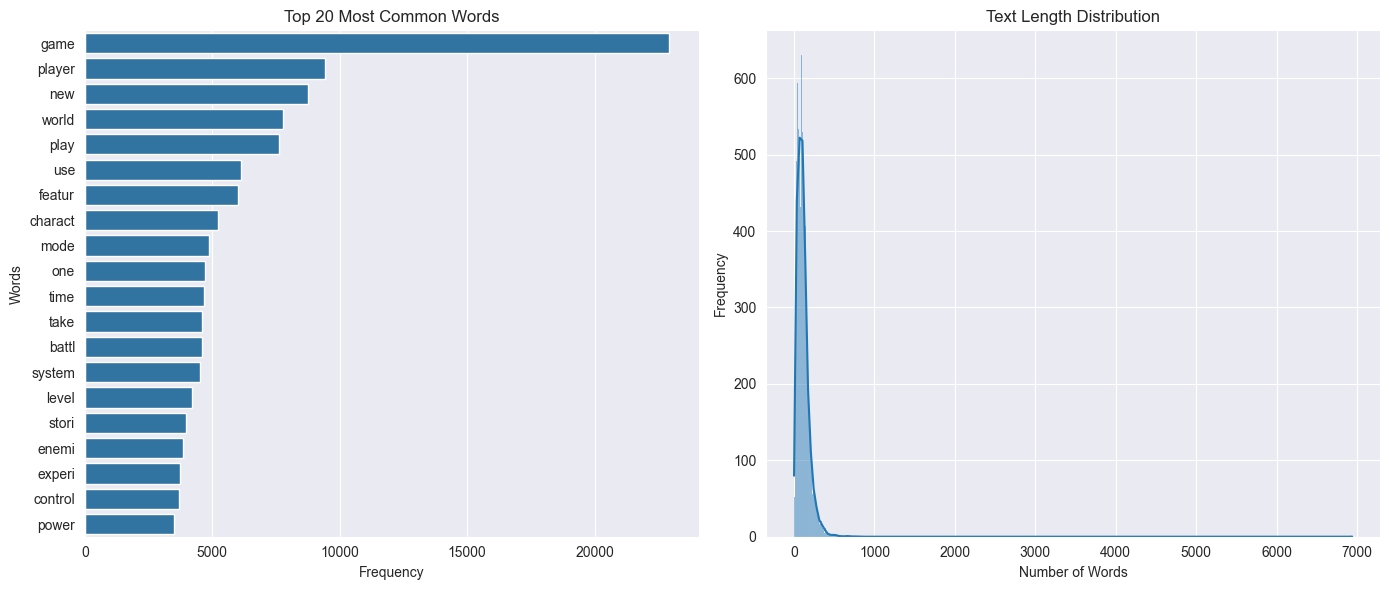

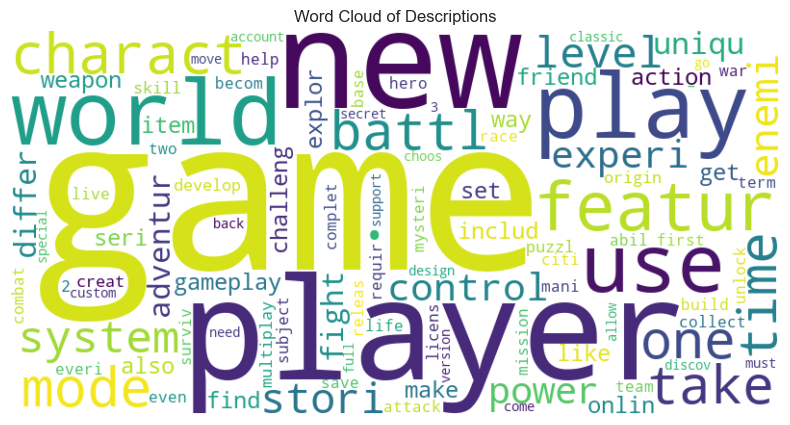

In [65]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Step 1: Tokenization and Lowercasing
# Create a simple function to tokenize and lowercase the text
def tokenize(text):
    return text.lower().split()

# Apply the function to the cleaned descriptions
app_details_df['tokens'] = app_details_df['final_cleaned_description'].apply(tokenize)

# Flatten the list of tokens to analyze word frequency
all_words = [word for tokens in app_details_df['tokens'] for word in tokens]

# Count word frequencies
word_freq = Counter(all_words)

# Step 2: Word Frequency Analysis
# Get the 20 most common words
common_words = word_freq.most_common(20)

# Step 3: Text Length Distribution
# Calculate the length of each description
app_details_df['description_length'] = app_details_df['final_cleaned_description'].apply(lambda x: len(x.split()))

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot word frequency
words, counts = zip(*common_words)
sns.barplot(x=list(counts), y=list(words), ax=axes[0])
axes[0].set_title('Top 20 Most Common Words')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Words')

# Plot text length distribution
sns.histplot(app_details_df['description_length'], kde=True, ax=axes[1])
axes[1].set_title('Text Length Distribution')
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 4: Word Cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Descriptions')
plt.show()


In [66]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\barak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
# print and save to file all the nltk stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)
# save the stop_words to a file
# with open('../data/stopwords.txt', 'w') as f:
#     for word in stop_words:
#         f.write(word + '\n')
        


{'ain', 'such', 'after', 'being', 'no', 'won', "haven't", 'is', "should've", "hasn't", 'be', 'can', 'all', 'don', "shan't", "you've", 'does', 'further', 'wouldn', 'once', 'how', "won't", "that'll", 'under', 'any', 'before', 'out', "it's", 'doesn', "you're", 'most', 'isn', 'why', 'from', 'yourselves', "aren't", "hadn't", 'o', 'mightn', 'their', 'about', 'here', 'as', 'up', 'were', 'was', 'through', 'more', "needn't", 'until', 'we', 'an', 'while', 'both', 'if', 'aren', 'off', 'than', 'theirs', 'had', 'should', 'herself', 'those', 'nor', 'what', 're', 'where', 'against', 'then', 'yours', 'hadn', 'shan', 'myself', 'just', 'into', 'own', 'again', 've', 'that', 'my', 'so', 'ourselves', 'and', 'they', "you'll", 'between', 'themselves', 'to', "she's", 'me', 's', 'didn', 'ours', 'yourself', 'him', 'hers', "didn't", 'the', 'do', 'these', "wasn't", 'itself', 'himself', 'other', 'down', 'd', 'few', 'now', 'am', 'she', "doesn't", 'but', 'weren', "mustn't", 'some', "weren't", 'this', 'your', 'our', 

In [68]:
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Assuming 'tokens' is a column in your DataFrame with tokenized text
app_details_df['tokens_no_stopwords'] = app_details_df['tokens'].apply(remove_stopwords)

# Reconstruct the descriptions after stopword removal
app_details_df['description_no_stopwords'] = app_details_df['tokens_no_stopwords'].apply(lambda x: ' '.join(x))


In [69]:
# show word frequency after removing stopwords
all_words_no_stopwords = [word for tokens in app_details_df['tokens_no_stopwords'] for word in tokens]
word_freq_no_stopwords = Counter(all_words_no_stopwords)

# Get the 20 most common words after removing stopwords
common_words_no_stopwords = word_freq_no_stopwords.most_common(20)
print(common_words_no_stopwords)


[('game', 22935), ('player', 9442), ('new', 8766), ('world', 7760), ('play', 7604), ('use', 6117), ('featur', 5997), ('charact', 5243), ('mode', 4888), ('one', 4703), ('time', 4689), ('take', 4618), ('battl', 4617), ('system', 4534), ('level', 4221), ('stori', 3973), ('enemi', 3857), ('experi', 3747), ('control', 3688), ('power', 3514)]


In [70]:
from nltk.stem import PorterStemmer
import string

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Additional words to remove (very common and generic)
extra_stopwords = {'game', 'play', 'new'}

# Function to clean and stem the tokens
def further_clean_tokens(tokens):
    # Remove punctuation and numbers, and apply stemming
    cleaned_tokens = [
        stemmer.stem(word) 
        for word in tokens 
        if word not in string.punctuation 
        and word not in extra_stopwords 
        and not word.isdigit()
    ]
    return cleaned_tokens

# Apply the further cleaning function
app_details_df['tokens_fully_cleaned'] = app_details_df['tokens_no_stopwords'].apply(further_clean_tokens)

# Reconstruct the descriptions after full cleaning
app_details_df['description_fully_cleaned'] = app_details_df['tokens_fully_cleaned'].apply(lambda x: ' '.join(x))

# Show the top 20 most common words after full cleaning
all_words_fully_cleaned = [word for tokens in app_details_df['tokens_fully_cleaned'] for word in tokens]
word_freq_fully_cleaned = Counter(all_words_fully_cleaned)
common_words_fully_cleaned = word_freq_fully_cleaned.most_common(20)

common_words_fully_cleaned


[('player', 9442),
 ('world', 7760),
 ('use', 6117),
 ('featur', 5997),
 ('charact', 5255),
 ('mode', 4888),
 ('one', 4703),
 ('time', 4689),
 ('take', 4618),
 ('battl', 4617),
 ('system', 4534),
 ('level', 4221),
 ('stori', 3973),
 ('enemi', 3857),
 ('experi', 3818),
 ('control', 3688),
 ('power', 3515),
 ('•', 3442),
 ('uniqu', 3413),
 ('differ', 3400)]

In [71]:
# show the final cleaned data
app_details_df.head()

,id,name,esrb_rating,description,cleaned_description,final_cleaned_description,tokens,description_length,tokens_no_stopwords,description_no_stopwords,tokens_fully_cleaned,description_fully_cleaned
0,3498,Grand Theft Auto V,Mature,"<p>Rockstar Games went bigger, since their pre...","rockstar games went bigger, since their previo...",rockstar game went bigger sinc previou instal ...,"[rockstar, game, went, bigger, sinc, previou, ...",100,"[rockstar, game, went, bigger, sinc, previou, ...",rockstar game went bigger sinc previou instal ...,"[rockstar, went, bigger, sinc, previou, instal...",rockstar went bigger sinc previou instal seri ...
1,3328,The Witcher 3: Wild Hunt,Mature,"<p>The third game in a series, it holds nothin...","the third game in a series, it holds nothing b...",third game seri hold noth back player open wor...,"[third, game, seri, hold, noth, back, player, ...",98,"[third, game, seri, hold, noth, back, player, ...",third game seri hold noth back player open wor...,"[third, seri, hold, noth, back, player, open, ...",third seri hold noth back player open world ad...
2,4200,Portal 2,Everyone 10+,<p>Portal 2 is a first-person puzzle game deve...,portal 2 is a first-person puzzle game develop...,portal 2 firstperson puzzl game develop valv c...,"[portal, 2, firstperson, puzzl, game, develop,...",194,"[portal, 2, firstperson, puzzl, game, develop,...",portal 2 firstperson puzzl game develop valv c...,"[portal, firstperson, puzzl, develop, valv, co...",portal firstperson puzzl develop valv corpor r...
3,4291,Counter-Strike: Global Offensive,Mature,<p>Counter-Strike is a multiplayer phenomenon ...,counter-strike is a multiplayer phenomenon in ...,counterstrik multiplay phenomenon simplic comp...,"[counterstrik, multiplay, phenomenon, simplic,...",112,"[counterstrik, multiplay, phenomenon, simplic,...",counterstrik multiplay phenomenon simplic comp...,"[counterstrik, multiplay, phenomenon, simplic,...",counterstrik multiplay phenomenon simplic comp...
4,5286,Tomb Raider (2013),Mature,<p>A cinematic revival of the series in its ac...,a cinematic revival of the series in its actio...,cinemat reviv seri action third person form to...,"[cinemat, reviv, seri, action, third, person, ...",121,"[cinemat, reviv, seri, action, third, person, ...",cinemat reviv seri action third person form to...,"[cinemat, reviv, seri, action, third, person, ...",cinemat reviv seri action third person form to...


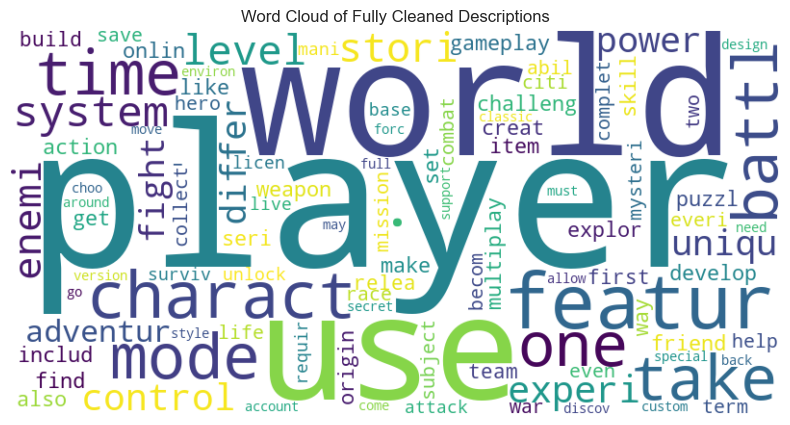

In [72]:
# word cloud of the fully cleaned data
wordcloud_fully_cleaned = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(word_freq_fully_cleaned)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fully_cleaned, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Fully Cleaned Descriptions')
plt.show()


In [73]:
# import pandas as pd
# temp_data_details_pd = pd.read_csv('../data/games.csv')
# temp_data_details_pd.head()
# print(temp_data_details_pd.shape)

['Mature' 'Everyone 10+' 'Teen' 'Adults Only' 'Everyone' 'Rating Pending']


<Axes: xlabel='esrb_rating'>

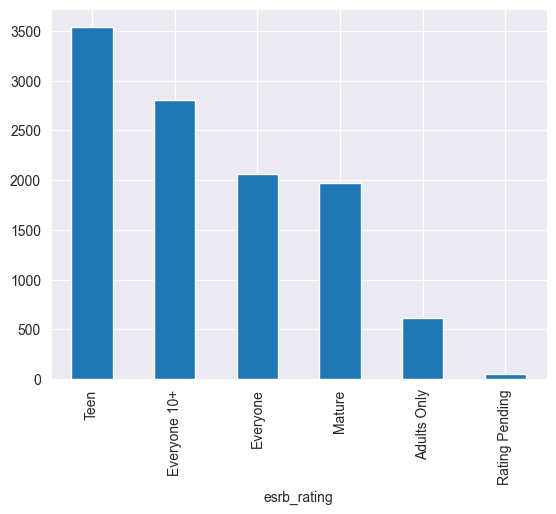

In [74]:
# show 'esrb_rating' column unique values
print(app_details_df['esrb_rating'].unique())

# show 'esrb_rating' column distribution
app_details_df['esrb_rating'].value_counts()
# plot the distribution of 'esrb_rating' column
app_details_df['esrb_rating'].value_counts().plot(kind='bar')

(7573, 12)


<Axes: xlabel='esrb_rating'>

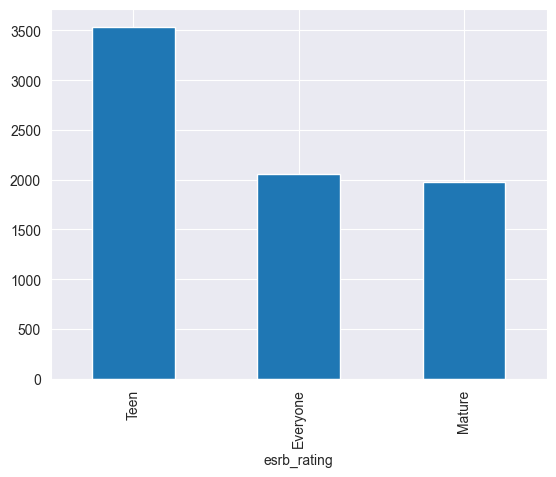

In [75]:
# keep only the data for Mature, Everyone, and Teen
app_details_df = app_details_df[app_details_df['esrb_rating'].isin(['Mature', 'Everyone', 'Teen'])]

# show the shape of the data
print(app_details_df.shape)

# show the distribution of 'esrb_rating' column
app_details_df['esrb_rating'].value_counts()

# even the distribution of the data
app_details_df['esrb_rating'].value_counts().plot(kind='bar')

In [76]:


# make the distribution of the data even
# get the minimum count of the 'esrb_rating' column
min_count = app_details_df['esrb_rating'].value_counts().min()

# sample the data for each 'esrb_rating' to the minimum count
app_details_df_even = app_details_df.groupby('esrb_rating').apply(lambda x: x.sample(min_count)).reset_index(drop=True)

# show the shape of the data
print(app_details_df_even.shape)

# show the distribution of 'esrb_rating' column
app_details_df_even['esrb_rating'].value_counts()


(5925, 12)


esrb_rating
Everyone    1975
Mature      1975
Teen        1975
Name: count, dtype: int64

In [77]:
# change each of the labels to be the first letter
app_details_df_even['esrb_rating'] = app_details_df_even['esrb_rating'].apply(lambda x: x[0])

# show the distribution of 'esrb_rating' column
app_details_df_even['esrb_rating'].value_counts()

app_details_df_even.head()

,id,name,esrb_rating,description,cleaned_description,final_cleaned_description,tokens,description_length,tokens_no_stopwords,description_no_stopwords,tokens_fully_cleaned,description_fully_cleaned
0,53419,Metal Slug Advance,E,<p>Metal Slug Advance is a run and gun video g...,metal slug advance is a run and gun video game...,metal slug advanc run gun video game game boy ...,"[metal, slug, advanc, run, gun, video, game, g...",34,"[metal, slug, advanc, run, gun, video, game, g...",metal slug advanc run gun video game game boy ...,"[metal, slug, advanc, run, gun, video, boy, ad...",metal slug advanc run gun video boy advanc han...
1,40972,Red Bull X-Fighters,E,"<p>With Red Bull X-Fighters, gamers around the...","with red bull x-fighters, gamers around the wo...",red bull xfighter gamer around world experi th...,"[red, bull, xfighter, gamer, around, world, ex...",72,"[red, bull, xfighter, gamer, around, world, ex...",red bull xfighter gamer around world experi th...,"[red, bull, xfighter, gamer, around, world, ex...",red bull xfighter gamer around world experi th...
2,29454,Salt Lake 2002,E,<p>Salt Lake 2002 features six official events...,"salt lake 2002 features six official events, a...",salt lake 2002 featur six offici event authent...,"[salt, lake, 2002, featur, six, offici, event,...",86,"[salt, lake, 2002, featur, six, offici, event,...",salt lake 2002 featur six offici event authent...,"[salt, lake, featur, six, offici, event, authe...",salt lake featur six offici event authent olym...
3,58878,Team Sonic Racing,E,<p>Team Sonic Racing combines the best element...,team sonic racing combines the best elements o...,team sonic race combin best element arcad fast...,"[team, sonic, race, combin, best, element, arc...",148,"[team, sonic, race, combin, best, element, arc...",team sonic race combin best element arcad fast...,"[team, sonic, race, combin, best, element, arc...",team sonic race combin best element arcad fast...
4,12772,Project Starship,E,Project Starship is an arcade bullet-hell with...,project starship is an arcade bullet-hell with...,project starship arcad bullethel random mechan...,"[project, starship, arcad, bullethel, random, ...",36,"[project, starship, arcad, bullethel, random, ...",project starship arcad bullethel random mechan...,"[project, starship, arcad, bullethel, random, ...",project starship arcad bullethel random mechan...


# Convert Text to Features

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the cleaned text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(app_details_df_even['description_fully_cleaned'])

# Define the target variable
y = app_details_df_even['esrb_rating']


# Model Evaluation

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")



Accuracy: 0.6776371308016877
Classification Report:
              precision    recall  f1-score   support

           E       0.77      0.74      0.76       418
           M       0.70      0.69      0.69       392
           T       0.56      0.60      0.58       375

    accuracy                           0.68      1185
   macro avg       0.68      0.68      0.68      1185
weighted avg       0.68      0.68      0.68      1185



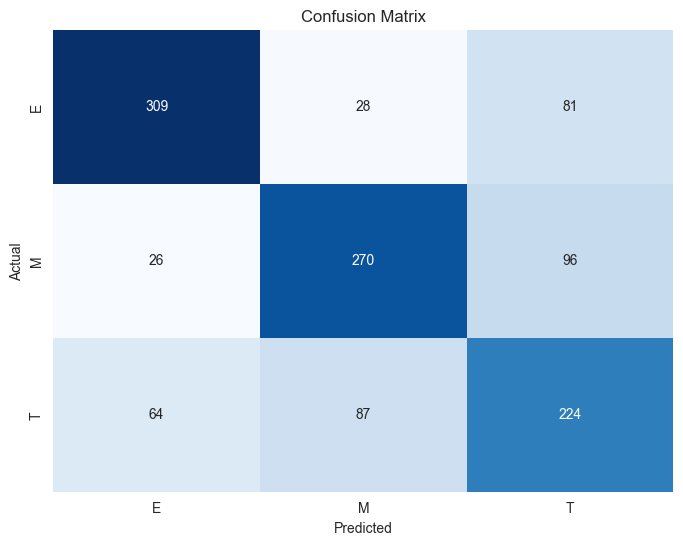

In [80]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [82]:
# save the model to a file
import joblib

# Save the model to a file
joblib.dump(model, '../models/esrb_classification_model.pkl')


['../models/esrb_classification_model.pkl']

Accuracy: 0.6936708860759494
Classification Report:
              precision    recall  f1-score   support

           E       0.81      0.74      0.77       418
           M       0.72      0.70      0.71       392
           T       0.56      0.64      0.60       375

    accuracy                           0.69      1185
   macro avg       0.70      0.69      0.69      1185
weighted avg       0.70      0.69      0.70      1185



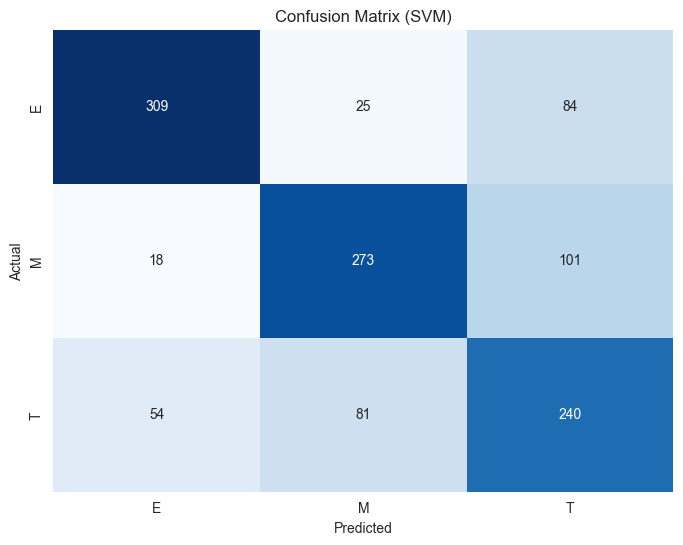

In [83]:
# try SVM model
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f"Accuracy: {accuracy_svm}")
print(f"Classification Report:\n{report_svm}")

# Create a confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='g', cbar=False, 
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()


In [ ]:
# Save the SVM model to a file
joblib.dump(svm_model, '../models/esrb_classification_model_svm.pkl')


Accuracy: 0.6489451476793249
Classification Report:
              precision    recall  f1-score   support

           E       0.69      0.76      0.72       418
           M       0.65      0.68      0.66       392
           T       0.59      0.49      0.54       375

    accuracy                           0.65      1185
   macro avg       0.64      0.64      0.64      1185
weighted avg       0.64      0.65      0.64      1185



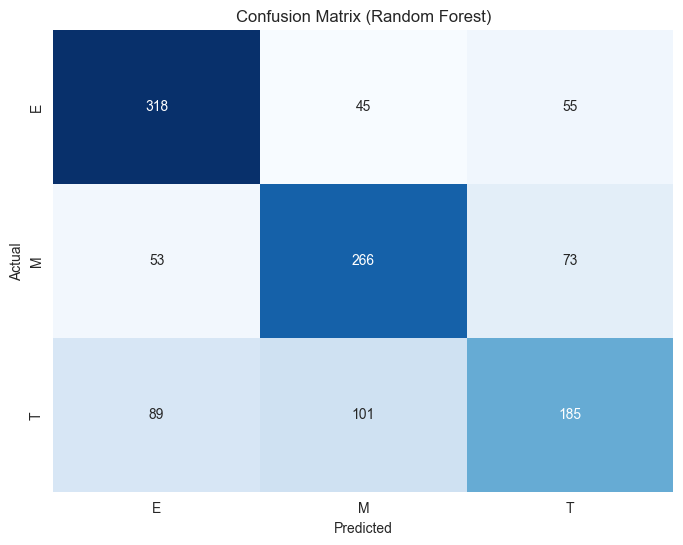

In [84]:
# try Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print(f"Classification Report:\n{report_rf}")

# Create a confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', cbar=False, 
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()


In [ ]:
# Save the Random Forest model to a file
joblib.dump(rf_model, '../models/esrb_classification_model_rf.pkl')


C:\Users\barak\Development\projects\Machine-Learning\esrb_rating_prediction\ESRB-Rating-Prediction\.venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\barak\Development\projects\Machine-Learning\esrb_rating_prediction\ESRB-Rating-Prediction\.venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Accuracy: 0.37046413502109704
Classification Report:
              precision    recall  f1-score   support

           E       0.36      0.99      0.53       418
           M       0.56      0.02      0.04       392
           T       0.55      0.04      0.08       375

    accuracy                           0.37      1185
   macro avg       0.49      0.35      0.22      1185
weighted avg       0.49      0.37      0.23      1185



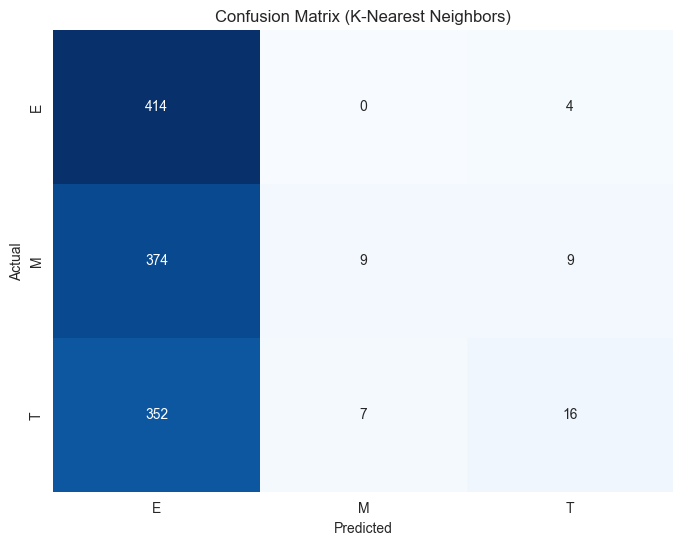

In [85]:
# try K-Nearest Neighbors model
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors model
knn_model = KNeighborsClassifier()
    
# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print(f"Accuracy: {accuracy_knn}")
print(f"Classification Report:\n{report_knn}")

# Create a confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='g', cbar=False, 
            xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (K-Nearest Neighbors)')
plt.show()


In [ ]:
# Save the K-Nearest Neighbors model to a file
joblib.dump(knn_model, '../models/esrb_classification_model_knn.pkl')

Accuracy: 0.6742616033755274
Classification Report:
              precision    recall  f1-score   support

           E       0.78      0.74      0.76       418
           M       0.67      0.70      0.69       392
           T       0.56      0.57      0.57       375

    accuracy                           0.67      1185
   macro avg       0.67      0.67      0.67      1185
weighted avg       0.68      0.67      0.68      1185



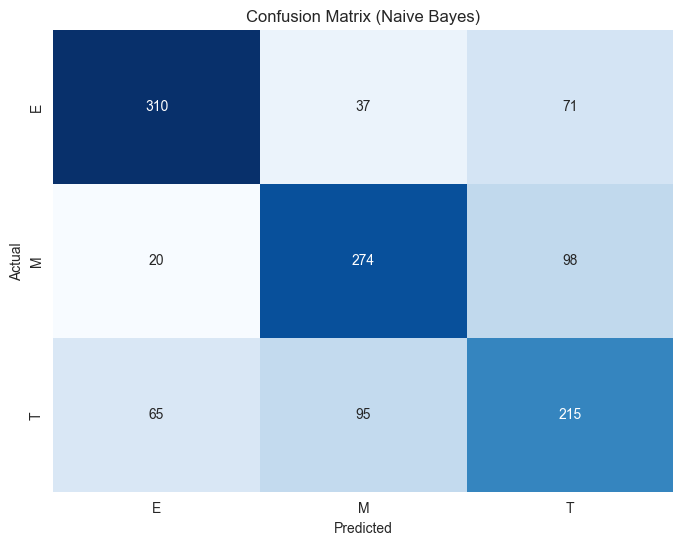

In [86]:
# try Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print(f"Accuracy: {accuracy_nb}")
print(f"Classification Report:\n{report_nb}")

# Create a confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g', cbar=False, 
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()
